In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
class Choice:
    @staticmethod
    def choice(integer: int, x: np.array) -> tuple:
        """Takes a function corresponding to 'integer' of 
           the array x.

        Args:
            integer (int): Integer in the inteval [0,3].
            x (np.array): 1d array

        Returns:
            tuple: (function of x, integer corresponding
                                        to the function)
        """
        match integer:
            case 0:
                return (np.random.uniform(0.1,10)*np.sin(x), 0)
            case 1:
                return (np.random.uniform(0.1,10)*np.sqrt(x), 1)
            case 2:
                return (np.random.uniform(0.1,10)*x**3 + 0.3*x, 2)
            case 3:
                return (np.random.uniform(0.1,10)*np.log(1+x), 3)

    @staticmethod
    def choice_str(func_list: list[int]) -> str:
        """Takes a list if integers and returns 
        a string corresponding to the functions 
        the integers represent. This is the fu-
        nctions from Choice.choice. 

        Args:
            func_list (list[int]): integers mu-
                st be in the interval [0,3]

        Returns:
            str: The functions corresponding to
                the integers.

        Example:
            Choice.choice_str([0, 1]) 
            >>> 'sqrt(sin(x))'
        """
        for i, item in enumerate(func_list):
            if i == 0:
                match item:
                    case 0:
                        x = 'sin(x)'
                    case 1:
                        x = 'sqrt(x)'
                    case 2:
                        x = 'x**3+0.3x'
                    case 3:
                        x = 'log(1+x)'
            else:
                match item:
                    case 0:
                        x = f'sin({x})'
                    case 1:
                        x = f'sqrt({x})'
                    case 2:
                        x = f'({x})**3+0.3({x})'
                    case 3:
                        x = f'log(1+({x}))'
                    
        return x

def non_lin_generator(label=[False, None], choice_list=[0, 1, 2, 3]) -> tuple[np.array, int]:
    bounds = np.random.uniform(-10000, 10000, 2)
    #x = np.linspace(0,100,1000)
    x = np.linspace(np.min(bounds), np.max(bounds), 1000)

    random_label = np.random.uniform(0,1) > 0.5
    
    lab_type = random_label
    if label[0]:
        lab_type = label[1] # 0 is interpreted as False, 1 as True

    if lab_type:
        # Dependent X and Y
        lab = 1
        combs_x = np.random.choice(choice_list, 2, replace=False)
        random_iters = np.random.randint(1,4)
        combs_x = np.concatenate([combs_x, np.random.choice(combs_x, random_iters, replace=True)])

        funcs = []
        for comb in combs_x:
            X, func = Choice.choice(comb, x)

            funcs.append(func)
            x = X.copy()
        

        combs_y = np.random.choice(choice_list, 1, replace=False)
        X_y = X.copy()
        funcs_y = []
        for comb in combs_y:
            Y, func_y = Choice.choice(comb, X_y)
            funcs_y.append(func_y)
            X_y = Y.copy()

    else:
        # independent X and Y
        lab = 0
        combs_x = np.random.choice(choice_list, 2, replace=False)
        random_iters_x = np.random.randint(1,4)
        combs_x = np.concatenate([combs_x, np.random.choice(combs_x, random_iters_x, replace=True)])

        funcs = []
        for comb in combs_x:
            X, func = Choice.choice(comb, x)
            funcs.append(func)
            x = X.copy()
        
        bounds_Y = np.random.uniform(-10000, 10000, 2)
        #x = np.linspace(0,100,1000)
        x_Y = np.linspace(np.min(bounds_Y), np.max(bounds_Y), 1000)
        # taking the two other func than X uses
        combs_y = list(set.symmetric_difference(set(combs_x), set(choice_list)))
        random_iters_y = np.random.randint(1,4)
        combs_y = np.concatenate([combs_y, np.random.choice(combs_y, random_iters_y, replace=True)])
        funcs_y = []
        for comb in combs_y:
            Y, func_y = Choice.choice(comb, x_Y)
            funcs_y.append(func_y)
            x = Y.copy()
    
    data = np.vstack([X, Y]).T
    return data, lab, (funcs, funcs_y)


def save_data(file_path: str, data: np.array, labels: np.array, normalize=True, rand_index=True) -> None:
    """Takes the path and name in one string and saves the file
    at that location as a .npy.

    Args:
        file_path (str): The path with the path to the folder where the
    data is saved.
        data (np.array): The samples consisting of x and y
        labels (np.array): Labels to the data
        normalize (bool, optional): Defaults to True.
        rand_index (bool, optional): Defaults to True.
    
    Example using savedata/loaddata:
    path = "test"
    save_data(path, data, labels) # saves data as .npy file
    data, labels = load_data(path) # loads .npy file
    """
    if normalize:
        for i in range(len(data)):
            data[i] = data[i]/np.max(data[i])
            
    if rand_index:
        index = np.random.choice(len(labels), len(labels), replace=False)
        data = data[index]
        labels = labels[index] 
    
    if file_path[-4:] != '.npy':
        file_path += '.npy'

    with open(file_path, 'wb') as f:
        np.save(f, data)
        np.save(f, labels)

In [4]:
maxiter = 10000000

samples = 5000
xy_len = 1000
dim = 2

data = np.zeros((samples, xy_len, dim))
labels = np.zeros(samples)
count = 0
functions = []
label_data = 0
for i in range(maxiter):
    if count == samples:
        break
    if count >= samples//2:
        label_data = 1
    dat, lab, func = non_lin_generator(label=[True, label_data])
    if True not in np.isnan(dat) and np.max(np.abs(dat)) < 1E4:
        data[count] = dat
        labels[count] = lab
        functions.append(func)

        count += 1

/var/folders/0y/7pbqzqwx41sbvsy1s77pqh_00000gn/T/ipykernel_15997/3712248465.py:23: RuntimeWarning: invalid value encountered in log
  return (np.random.uniform(0.1,10)*np.log(1+x), 3)
/var/folders/0y/7pbqzqwx41sbvsy1s77pqh_00000gn/T/ipykernel_15997/3712248465.py:19: RuntimeWarning: invalid value encountered in sqrt
  return (np.random.uniform(0.1,10)*np.sqrt(x), 1)
/var/folders/0y/7pbqzqwx41sbvsy1s77pqh_00000gn/T/ipykernel_15997/3712248465.py:21: RuntimeWarning: overflow encountered in power
  return (np.random.uniform(0.1,10)*x**3 + 0.3*x, 2)
/var/folders/0y/7pbqzqwx41sbvsy1s77pqh_00000gn/T/ipykernel_15997/3712248465.py:21: RuntimeWarning: overflow encountered in multiply
  return (np.random.uniform(0.1,10)*x**3 + 0.3*x, 2)


In [142]:
new_file = 'data_'+f'({samples}_{xy_len}_{dim})'
isExist = os.path.exists(new_file)
if not isExist:
    os.makedirs(new_file)
    print("The new directory is created!")

save_data(new_file+'/nonlin_data', data, labels)

The new directory is created!


In [7]:
Choice.choice_str(functions[0][0]), Choice.choice_str(functions[0][1])

('(sin(x**3+0.3x))**3+0.3(sin(x**3+0.3x))', 'sqrt(log(1+(sqrt(x))))')

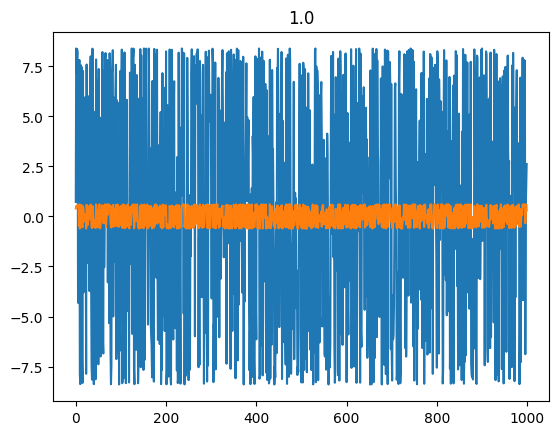

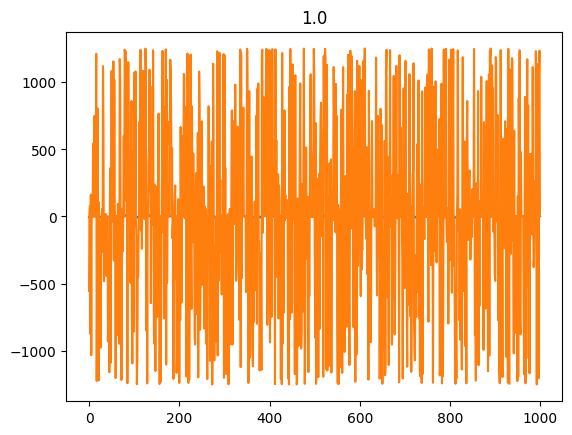

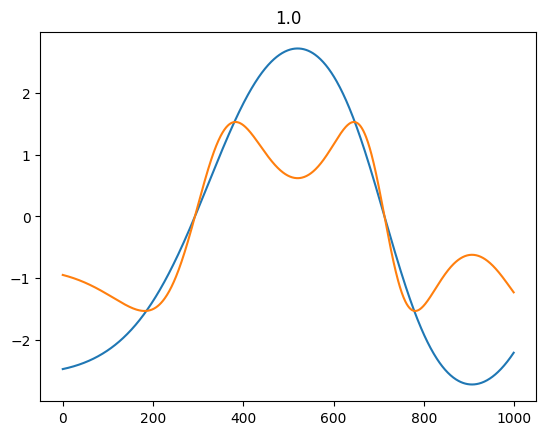

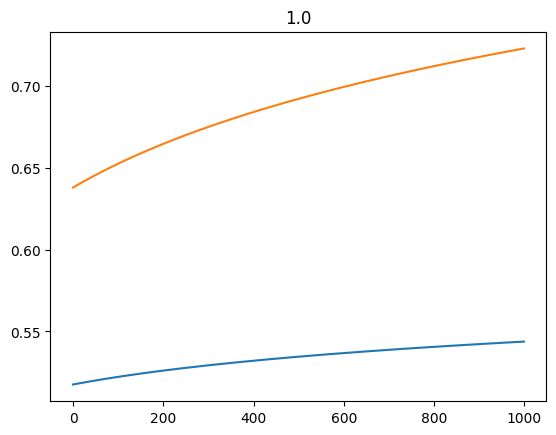

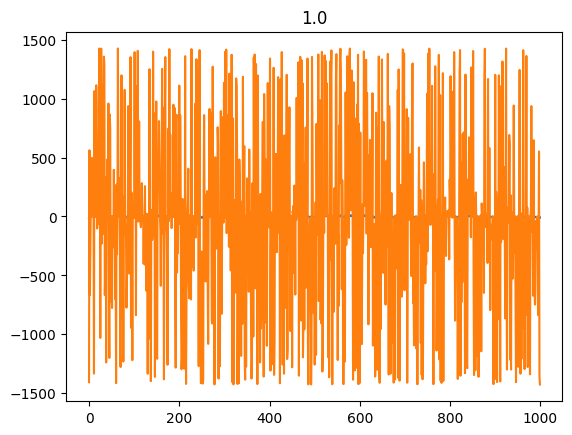

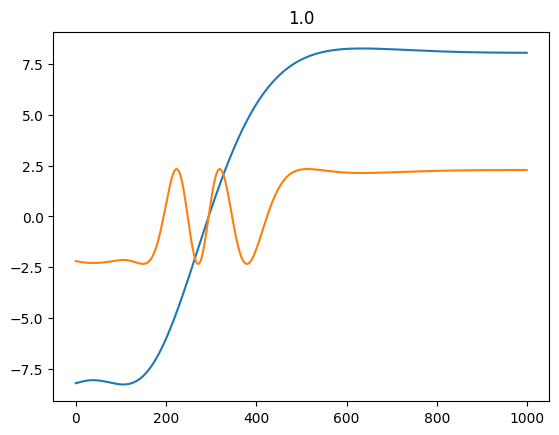

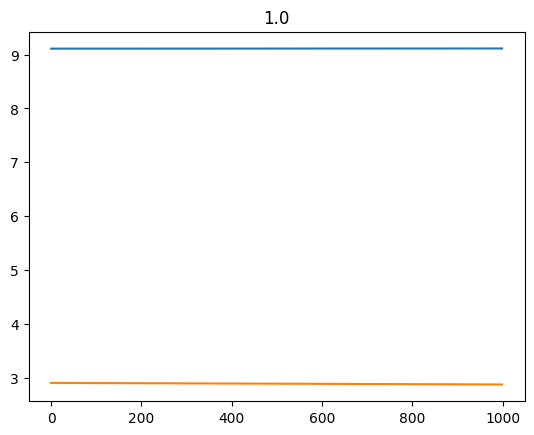

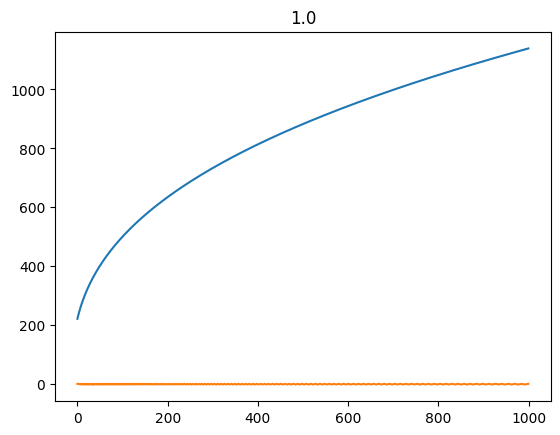

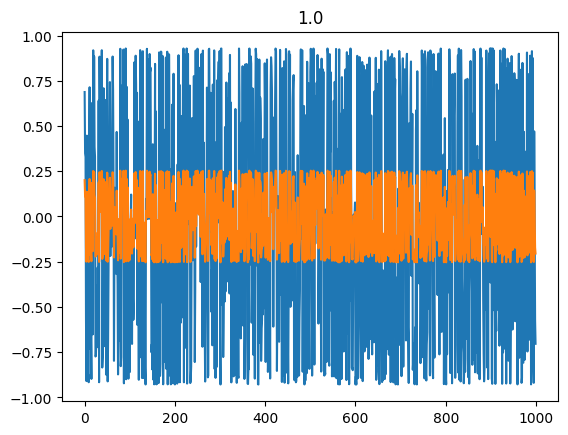

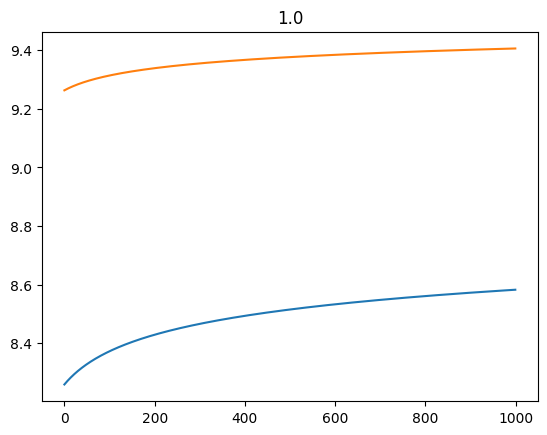

In [9]:
for i in range(10):
    plt.plot(data[i+2500])
    plt.title(f"{labels[i+2500]}")
    plt.show()